In [1]:
import pandas as pd
# Loading the clean data
df=pd.read_excel('cleaned_data_withHTML.xlsx')
#converting all columns to all caps
df['COURSE_CODE'] = df['COURSE_CODE'].str.upper()
df['MEETING_DAYS'] = df['MEETING_DAYS'].str.upper()
df['CLASS_TYPE']=df['CLASS_TYPE'].str.upper()
df['INSTRUCTOR']=df['INSTRUCTOR'].str.upper()
df['COURSE_NAME']=df['COURSE_NAME'].str.upper()
# Correcting the name of column
df = df.rename(columns={'SEATS_AVAILABALE': 'SEATS_AVAILABLE'})
df.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,CMPE 30,PROGRAMMING CONCEPT & METH,1,3,LEC,2,MW,1100-1150,H OZEMEK,2013,SPRING
1,CMPE 30,PROGRAMMING CONCEPT & METH,2,0,LAB,1,R,1730-2020,P KANG,2013,SPRING
2,CMPE 30,PROGRAMMING CONCEPT & METH,3,0,LAB,1,W,1730-2020,C ABBOUD,2013,SPRING
3,CMPE 46,COMPE I,1,3,SEM,1,TR,1030-1120,F LIN,2013,SPRING
4,CMPE 46,COMPE I,2,0,LAB,1,T,1330-1620,F LIN,2013,SPRING


In [2]:
#Total rows calculation
row_count = len(df)
print(row_count)

8901


# Final Data preprocessing

In [3]:
#Handling SECTION_NUMBER
print(df['SECTION_NUMBER'].isnull().sum())
df['SECTION_NUMBER'].fillna(0, inplace=True)
print(df['SECTION_NUMBER'].isnull().sum())

0
0


In [4]:
df['UNITS'].fillna(3, inplace=True)
print(df['INSTRUCTOR'].isnull().sum())

647


In [5]:
df.head(5)

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,CMPE 30,PROGRAMMING CONCEPT & METH,1,3,LEC,2,MW,1100-1150,H OZEMEK,2013,SPRING
1,CMPE 30,PROGRAMMING CONCEPT & METH,2,0,LAB,1,R,1730-2020,P KANG,2013,SPRING
2,CMPE 30,PROGRAMMING CONCEPT & METH,3,0,LAB,1,W,1730-2020,C ABBOUD,2013,SPRING
3,CMPE 46,COMPE I,1,3,SEM,1,TR,1030-1120,F LIN,2013,SPRING
4,CMPE 46,COMPE I,2,0,LAB,1,T,1330-1620,F LIN,2013,SPRING


In [6]:
#Finding Unique values in UNITS column
value_counts = df['UNITS'].value_counts()
# print the result
print(value_counts)

3    6780
0    1273
1     512
4     250
2      74
6       8
5       4
Name: UNITS, dtype: int64


In [7]:
value_counts = df['SEMESTER'].value_counts()
# print the result
print(value_counts)

FALL      4660
SPRING    4241
Name: SEMESTER, dtype: int64


In [8]:
df.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,CMPE 30,PROGRAMMING CONCEPT & METH,1,3,LEC,2,MW,1100-1150,H OZEMEK,2013,SPRING
1,CMPE 30,PROGRAMMING CONCEPT & METH,2,0,LAB,1,R,1730-2020,P KANG,2013,SPRING
2,CMPE 30,PROGRAMMING CONCEPT & METH,3,0,LAB,1,W,1730-2020,C ABBOUD,2013,SPRING
3,CMPE 46,COMPE I,1,3,SEM,1,TR,1030-1120,F LIN,2013,SPRING
4,CMPE 46,COMPE I,2,0,LAB,1,T,1330-1620,F LIN,2013,SPRING


In [9]:
df_fall = df[df['SEMESTER'] == 'FALL']
len(df_fall)

4660

In [10]:
df_spring = df[df['SEMESTER'] == 'SPRING']
len(df_spring)

4241

In [11]:
df_fall.to_excel('fall_data.xlsx')

In [12]:
df_spring.to_excel('spring_data.xlsx')

# Encoding

In [14]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df_copy=df.copy()
df_copy.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,CMPE 30,PROGRAMMING CONCEPT & METH,1,3,LEC,2,MW,1100-1150,H OZEMEK,2013,SPRING
1,CMPE 30,PROGRAMMING CONCEPT & METH,2,0,LAB,1,R,1730-2020,P KANG,2013,SPRING
2,CMPE 30,PROGRAMMING CONCEPT & METH,3,0,LAB,1,W,1730-2020,C ABBOUD,2013,SPRING
3,CMPE 46,COMPE I,1,3,SEM,1,TR,1030-1120,F LIN,2013,SPRING
4,CMPE 46,COMPE I,2,0,LAB,1,T,1330-1620,F LIN,2013,SPRING


In [16]:
# Label encoding our data
df_copy['COURSE_CODE']=le.fit_transform(df_copy['COURSE_CODE'])
df_copy['COURSE_NAME']=le.fit_transform(df_copy['COURSE_NAME'])
df_copy['CLASS_TYPE']=le.fit_transform(df_copy['CLASS_TYPE'])
df_copy['MEETING_DAYS']=le.fit_transform(df_copy['MEETING_DAYS'])
df_copy['CLASS_HOURS']=le.fit_transform(df_copy['CLASS_HOURS'])
df_copy['SEMESTER']=le.fit_transform(df_copy['SEMESTER'])
df_copy['YEAR']=le.fit_transform(df_copy['YEAR'])
df_copy['INSTRUCTOR']=le.fit_transform(df_copy['INSTRUCTOR'])

In [17]:
df_copy.head()
df_copy['SEATS_AVAILABLE'].unique()

array([  2,   1,  10,   0,  26,  29,   4,  33,   5,  19,  25,   6,  11,
        22,  -3,  28,  -4,  17,   8,  18,  20,  32,  16,  30, -30,   7,
        13,  -5,  41,  21, -14,  12,  -7,   3,   9,  -2,  15,  37,  -1,
        -6,  14,  -8,  76, -13,  23,  24, -10,  27,  36,  39,  59,  31,
        44,  45, -65,  47, -41, -46, -31,  42,  35,  50, -12, -70,  79,
       -21, -17, -15,  51, -26, -16, -19, -18,  38,  49,  60,  40,  48,
        46,  54, -55, -11,  -9, -32, -20,  70, -23,  90,  80,  34, -60,
       -45,  64,  67,  43, -72, -66, -99,  65, -28,  68, -37, -27,  72,
        61,  89, -77,  55,  73,  57, -29,  53,  52,  58, -25, 177, 174,
        56,  66, 172, 175,  63, 126, 167,  83, 160, 169, 113, 151, 155,
        75, 180, 120, 140, -24, 134, 178,  62,  71, -38, -35, 171,  77,
       -22,  97, 179,  69, 116], dtype=int64)

In [18]:
# df_copy.loc[df_copy['SEATS_AVAILABLE'] > 40, 'SEATS_AVAILABLE'] = 10
# df_copy.loc[df_copy['SEATS_AVAILABLE'] < 0, 'SEATS_AVAILABLE'] = 0

# # Group the data by COURSE_CODE and calculate the max value of SEATS_AVAILABLE for each group
# max_seats = df_copy.groupby('COURSE_CODE')['SEATS_AVAILABLE'].max().reset_index()

# # Join the max_seats dataframe back to the original dataframe using COURSE_CODE as the key
# merged = df_copy.merge(max_seats, on='COURSE_CODE', suffixes=['', '_max'])

# # Divide the SEATS_AVAILABLE column by the max value for each group
# merged['SEATS_AVAILABLE'] = merged['SEATS_AVAILABLE'] / merged['SEATS_AVAILABLE_max']

# merged['SEATS_AVAILABLE_max'].unique()

In [19]:
# merged['SEATS_AVAILABLE'] = merged['SEATS_AVAILABLE'].fillna(0)
# merged['SEATS_AVAILABLE'].unique()

# Scaling

In [20]:
#Scaling
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()

In [21]:
df_scaled = scaler.fit_transform(df_copy)
df_scaled = pd.DataFrame(df_scaled, columns=df_copy.columns)

In [22]:
#Storing scaled values of seats available
seats_andscaled = pd.concat([df_scaled, df_copy['SEATS_AVAILABLE']], axis=1)
seats_andscaled.head()

#Renaming last column
# get the old column names
old_col_names = seats_andscaled.columns.tolist()

# rename the last column only
new_col_name = 'SEATS_UNSCALED'
old_col_names[-1] = new_col_name

# set the new column names
seats_andscaled.columns = old_col_names

seats_andscaled.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER,SEATS_UNSCALED
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.596388,-0.742716,-0.997454,-0.583817,-0.961011,1.048235,2
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.650613,-0.424287,0.729107,0.448771,-0.961011,1.048235,1
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,-0.650613,1.486291,0.729107,-1.219256,-0.961011,1.048235,1
3,-0.531616,-0.869518,-0.377062,0.458054,0.958934,-0.650613,1.167861,-1.187186,-0.734316,-0.961011,1.048235,1
4,-0.531616,-0.869518,-0.280125,-2.180871,-1.060161,-0.650613,0.531002,-0.276472,-0.734316,-0.961011,1.048235,1


In [24]:
import numpy as np
# Group the data by COURSE_CODE and calculate the max value of SEATS_AVAILABLE for each group
max_seats = seats_andscaled.groupby('COURSE_CODE')['SEATS_UNSCALED'].max().reset_index()

# Join the max_seats dataframe back to the original dataframe using COURSE_CODE as the key
seats_prob = seats_andscaled.merge(max_seats, on='COURSE_CODE', suffixes=['', '_max'])

# Divide the SEATS_AVAILABLE column by the max value for each group
seats_prob['SEATS_UNSCALED'] = seats_prob['SEATS_UNSCALED'] / seats_prob['SEATS_UNSCALED_max']
seats_prob['SEATS_UNSCALED'] = seats_prob['SEATS_UNSCALED'].fillna(0)
# replace inf and -inf values with 0
seats_prob['SEATS_UNSCALED'] = seats_prob['SEATS_UNSCALED'].replace([np.inf, -np.inf], 0)
seats_prob.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,SEATS_AVAILABLE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER,SEATS_UNSCALED,SEATS_UNSCALED_max
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.596388,-0.742716,-0.997454,-0.583817,-0.961011,1.048235,0.333333,6
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.650613,-0.424287,0.729107,0.448771,-0.961011,1.048235,0.166667,6
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,-0.650613,1.486291,0.729107,-1.219256,-0.961011,1.048235,0.166667,6
3,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.704839,-0.742716,-0.997454,-0.583817,-0.961011,-0.953984,0.000000,6
4,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.759065,-0.424287,0.729107,-1.219256,-0.961011,-0.953984,-0.166667,6


In [25]:
# create an empty dictionary
course_dict = {}

# iterate through the dataframe to match {course code:{Seats available scaled: Seats unscaled average}
for index, row in seats_prob.iterrows():
    # get the course code, seats available, and seats unscaled values
    course_code = row['COURSE_CODE']
    seats_available = row['SEATS_AVAILABLE']
    seats_unscaled = row['SEATS_UNSCALED']
    
    # if the course code doesn't exist in the outer dictionary, create a new inner dictionary
    if course_code not in course_dict:
        course_dict[course_code] = {}
    
    # add the seats available and seats unscaled values to the inner dictionary
    course_dict[course_code][seats_available] = seats_unscaled
    

print(course_dict)


{-0.542741155818184: {-0.5963875779638522: 0.3333333333333333, -0.6506134917639058: 0.16666666666666666, -0.7048394055639595: 0.0, -0.7590653193640131: -0.16666666666666666, -0.5421616641637986: 0.5, -0.487935750363745: 0.6666666666666666, -0.8675171469641203: -0.5, -0.3794839227636378: 1.0, -1.192872629764442: -1.5, -0.921743060764174: -0.6666666666666666, -0.9759689745642276: -0.8333333333333334}, -0.5316157661242393: {-0.6506134917639058: 1.0}, -0.5260530712772671: {-0.1625802675634233: 0.4, -0.7048394055639595: 0.0, -0.7590653193640131: -0.04, -0.8675171469641203: -0.12, -4.229523802567445: -2.6, 0.650808439437381: 1.0, 0.05432338763679116: 0.56, -0.6506134917639058: 0.04, -3.9583942335671765: -2.4, 0.217001129036952: 0.68, -0.21680618136347693: 0.36, -0.27103209516353055: 0.32, -0.5963875779638522: 0.08, -0.5421616641637986: 0.12}, -1.5551516179671472: {0.7050343532374346: 0.52, 0.8677120946375954: 0.58, 0.10854930143684478: 0.3, 0.37967887043711285: 0.4, 9.747383673754876e-05: 0.

In [26]:
# convert the dataframe to a dictionary
seats_dict = dict(zip(seats_andscaled['SEATS_AVAILABLE'], seats_andscaled['SEATS_UNSCALED']))

# print the resulting dictionary
print(seats_dict)

{-0.5963875779638522: 2, -0.6506134917639058: 1, -0.1625802675634233: 10, -0.7048394055639595: 0, 0.7050343532374346: 26, 0.8677120946375954: 29, -0.487935750363745: 4, 1.0846157498378097: 33, -0.4337098365636914: 5, 0.32545295663705925: 19, 0.650808439437381: 25, -0.3794839227636378: 6, -0.10835435376336969: 11, 0.4881306980372201: 22, -0.8675171469641203: -3, 0.8134861808375418: 28, -0.921743060764174: -4, 0.217001129036952: 17, -0.27103209516353055: 8, 0.27122704283700566: 18, 0.37967887043711285: 20, 1.0303898360377561: 32, 0.1627752152368984: 16, 0.921938008437649: 30, -2.331616819565568: -30, -0.32525800896358414: 7, 9.747383673754876e-05: 13, -0.9759689745642276: -5, 1.5184230602382387: 41, 0.4339047842371665: 21, -1.4640021987647103: -14, -0.054128439963316066: 12, -1.084420802164335: -7, -0.5421616641637986: 3, -0.21680618136347693: 9, -0.8132912331640667: -2, 0.10854930143684478: 15, 1.3015194050380243: 37, -0.7590653193640131: -1, -1.0301948883642813: -6, 0.05432338763679116

# Working on Outliers

In [43]:
# calculate the first quartile (Q1)
Q1 = y['SEATS_AVAILABLE'].quantile(0.25)

# calculate the third quartile (Q3)
Q3 = y['SEATS_AVAILABLE'].quantile(0.75)

# calculate the interquartile range (IQR)
IQR = Q3 - Q1

# define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find the outliers
outliers = y[(y['SEATS_AVAILABLE'] < lower_bound) | (y['SEATS_AVAILABLE'] > upper_bound)]

# print the outliers
print(len(outliers))
print(max(outliers))


159
SEATS_AVAILABLE


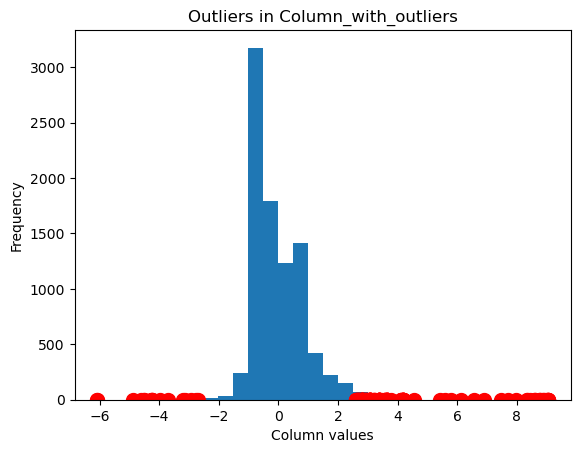

In [44]:
import matplotlib.pyplot as plt

# assume your dataframe column with outliers is named 'column_with_outliers'
outliers = y['SEATS_AVAILABLE'][(y['SEATS_AVAILABLE'] > upper_bound) | (y['SEATS_AVAILABLE'] < lower_bound)]

# plot a histogram of the column values
plt.hist(y['SEATS_AVAILABLE'], bins=30)

# plot red circles around the outliers
plt.plot(outliers, [0]*len(outliers), 'ro', markersize=10)

# add labels and title
plt.xlabel('Column values')
plt.ylabel('Frequency')
plt.title('Outliers in Column_with_outliers')

# show the plot
plt.show()


In [45]:
unique_values = y[(y['SEATS_AVAILABLE'] < 0) | (y['SEATS_AVAILABLE'] > 40)]['SEATS_AVAILABLE'].unique()
unique_values.sort()
unique_values

array([-6.07320487, -4.88023477, -4.6091052 , -4.50065337, -4.28374972,
       -4.2295238 , -3.95839423, -3.68726466, -3.19923144, -3.14500553,
       -2.92810187, -2.76542413, -2.71119822, -2.60274639, -2.44006865,
       -2.38584273, -2.33161682, -2.27739091, -2.22316499, -2.16893908,
       -2.11471316, -2.06048725, -2.00626134, -1.95203542, -1.89780951,
       -1.8435836 , -1.78935768, -1.73513177, -1.68090585, -1.62667994,
       -1.57245403, -1.51822811, -1.4640022 , -1.40977628, -1.35555037,
       -1.30132446, -1.24709854, -1.19287263, -1.13864672, -1.0844208 ,
       -1.03019489, -0.97596897, -0.92174306, -0.86751715, -0.81329123,
       -0.75906532, -0.70483941, -0.65061349, -0.59638758, -0.54216166,
       -0.48793575, -0.43370984, -0.37948392, -0.32525801, -0.2710321 ,
       -0.21680618, -0.16258027, -0.10835435, -0.05412844])

In [46]:
y.loc[y['SEATS_AVAILABLE'] < 0, 'SEATS_AVAILABLE'] = 0

In [50]:
y['SEATS_AVAILABLE'].value_counts().head(10)

0.000000    5287
0.921938     434
0.379679     242
0.650808     197
0.108549     194
0.867712     176
0.054323     137
0.813486     134
0.325453     131
0.000097     115
Name: SEATS_AVAILABLE, dtype: int64

In [51]:
y.loc[y['SEATS_AVAILABLE'] == 30, 'SEATS_AVAILABLE'] = 10
y.loc[y['SEATS_AVAILABLE'] == 29, 'SEATS_AVAILABLE'] = 10
y.loc[y['SEATS_AVAILABLE'] == 28, 'SEATS_AVAILABLE'] = 10
y.loc[y['SEATS_AVAILABLE'] == 25, 'SEATS_AVAILABLE'] = 10
y.loc[y['SEATS_AVAILABLE'] == 20, 'SEATS_AVAILABLE'] = 10

In [52]:
y['SEATS_AVAILABLE'].value_counts().head(20)

0.000000    5287
0.921938     434
0.379679     242
0.650808     197
0.108549     194
0.867712     176
0.054323     137
0.813486     134
0.325453     131
0.000097     115
0.162775     114
0.271227     113
0.759260     104
1.193068     103
0.217001     100
0.596583      93
0.705034      89
2.006456      86
0.433905      86
0.488131      80
Name: SEATS_AVAILABLE, dtype: int64

In [53]:
X = df_scaled.drop('SEATS_AVAILABLE', axis=1) 

In [54]:
y= pd.DataFrame({'SEATS_AVAILABLE': df_scaled['SEATS_AVAILABLE'].values})
temp=pd.DataFrame({'SEATS_AVAILABLE':y['SEATS_AVAILABLE'].values})
temp.head()

,SEATS_AVAILABLE
0,-0.596388
1,-0.650613
2,-0.650613
3,-0.650613
4,-0.650613


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.742716,-0.997454,-0.583817,-0.961011,1.048235
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.424287,0.729107,0.448771,-0.961011,1.048235
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,1.486291,0.729107,-1.219256,-0.961011,1.048235
3,-0.531616,-0.869518,-0.377062,0.458054,0.958934,1.167861,-1.187186,-0.734316,-0.961011,1.048235
4,-0.531616,-0.869518,-0.280125,-2.180871,-1.060161,0.531002,-0.276472,-0.734316,-0.961011,1.048235


In [57]:
#CALCULATING AVERAGE DATAFRAME

# group the data by COURSE_CODE and calculate the mean of other columns
grouped_data = X.groupby('COURSE_CODE').mean()

# drop duplicates of COURSE_CODE
grouped_data = grouped_data.drop_duplicates()

# create a new dataframe with unique COURSE_CODE and the calculated means
avg_df = pd.DataFrame({'COURSE_CODE': grouped_data.index,
                       'COURSE_NAME': grouped_data['COURSE_NAME'],
                       'SECTION_NUMBER': grouped_data['SECTION_NUMBER'],
                       'UNITS': grouped_data['UNITS'],
                       'CLASS_TYPE': grouped_data['CLASS_TYPE'],
                       'MEETING_DAYS': grouped_data['MEETING_DAYS'],
                       'CLASS_HOURS': grouped_data['CLASS_HOURS'],
                       'INSTRUCTOR': grouped_data['INSTRUCTOR'],
                       'YEAR': grouped_data['YEAR'],
                       'SEMESTER': grouped_data['SEMESTER']})

avg_df = avg_df.reset_index(drop=True)
avg_df.head()


,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER
0,-1.582965,-0.417850,-0.344750,0.458054,-0.429194,-0.105857,0.140938,0.699602,-1.646708,-0.286578
1,-1.577402,1.025185,-0.163802,-1.269242,-0.842190,0.206783,-0.080531,-0.596587,-0.100774,0.283752
2,-1.571840,-0.874034,-0.263969,-1.301229,-0.387129,-0.105857,-0.072511,-1.300776,-1.548751,0.047126
3,-1.566277,0.789177,-0.243197,-1.364061,-0.864862,0.402114,-0.214584,-0.593970,-0.226337,0.142469
4,-1.560714,0.869401,-0.328593,-1.301229,0.958934,0.743289,0.817649,0.568612,-1.646708,-0.286578


In [58]:
new_df = pd.DataFrame({'COURSE_CODE': avg_df['COURSE_CODE']})
avg_df.to_excel('avg_df.xlsx')
new_df.head()

new_df.to_excel('new_df.xlsx', index = False)

In [59]:
DICT_X = pd.concat([X, df['COURSE_CODE']], axis=1)
DICT_X.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER,COURSE_CODE
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.742716,-0.997454,-0.583817,-0.961011,1.048235,CMPE 30
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.424287,0.729107,0.448771,-0.961011,1.048235,CMPE 30
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,1.486291,0.729107,-1.219256,-0.961011,1.048235,CMPE 30
3,-0.531616,-0.869518,-0.377062,0.458054,0.958934,1.167861,-1.187186,-0.734316,-0.961011,1.048235,CMPE 46
4,-0.531616,-0.869518,-0.280125,-2.180871,-1.060161,0.531002,-0.276472,-0.734316,-0.961011,1.048235,CMPE 46


In [60]:
#Renaming last column
# get the old column names
old_col_names = DICT_X.columns.tolist()

# rename the last column only
new_col_name = 'COURSE_TEXT'
old_col_names[-1] = new_col_name

# set the new column names
DICT_X.columns = old_col_names
DICT_X.head()

,COURSE_CODE,COURSE_NAME,SECTION_NUMBER,UNITS,CLASS_TYPE,MEETING_DAYS,CLASS_HOURS,INSTRUCTOR,YEAR,SEMESTER,COURSE_TEXT
0,-0.542741,1.027485,-0.377062,0.458054,-0.429194,-0.742716,-0.997454,-0.583817,-0.961011,1.048235,CMPE 30
1,-0.542741,1.027485,-0.280125,-2.180871,-1.060161,-0.424287,0.729107,0.448771,-0.961011,1.048235,CMPE 30
2,-0.542741,1.027485,-0.183189,-2.180871,-1.060161,1.486291,0.729107,-1.219256,-0.961011,1.048235,CMPE 30
3,-0.531616,-0.869518,-0.377062,0.458054,0.958934,1.167861,-1.187186,-0.734316,-0.961011,1.048235,CMPE 46
4,-0.531616,-0.869518,-0.280125,-2.180871,-1.060161,0.531002,-0.276472,-0.734316,-0.961011,1.048235,CMPE 46


In [61]:
# convert the dataframe to a dictionary
result_dict = dict(zip(DICT_X['COURSE_TEXT'], DICT_X['COURSE_CODE']))

# print the resulting dictionary
print(result_dict)

{'CMPE 30': -0.542741155818184, 'CMPE 46': -0.5316157661242393, 'CMPE 50': -0.5260530712772671, 'CMPE 102': -1.5551516179671472, 'CMPE 110': -1.5440262282732025, 'CMPE 120': -1.5329008385792577, 'CMPE 124': -1.5217754488853132, 'CMPE 125': -1.5106500591913685, 'CMPE 126': -1.4995246694974238, 'CMPE 127': -1.488399279803479, 'CMPE 130': -1.4772738901095346, 'CMPE 131': -1.4661485004155899, 'CMPE 133': -1.4438977210277006, 'CMPE 137': -1.4216469416398112, 'CMPE 138': -1.4105215519458667, 'CMPE 140': -1.3938334674049497, 'CMPE 142': -1.382708077711005, 'CMPE 146': -1.3715826880170603, 'CMPE 148': -1.3604572983231158, 'CMPE 152': -1.3382065189352264, 'CMPE 180': -1.293704960159448, 'CMPE 187': -1.2213899271488076, 'CMPE 195A': -1.1935764529139459, 'CMPE 197': -1.1379495044442227, 'CMPE 198': -1.1323868095972505, 'CMPE 200': -1.1212614199033057, 'CMPE 202': -1.110136030209361, 'CMPE 203': -1.0990106405154165, 'CMPE 206': -1.093447945668444, 'CMPE 207': -1.0823225559744996, 'CMPE 208': -1.07

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

C:\Users\Checkout\AppData\Local\Temp\ipykernel_26860\3300557753.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [63]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.287935)
2. feature 8 (0.162726)
3. feature 7 (0.136815)
4. feature 1 (0.101198)
5. feature 6 (0.086711)
6. feature 2 (0.079275)
7. feature 3 (0.051146)
8. feature 4 (0.044209)
9. feature 5 (0.025958)
10. feature 9 (0.024028)


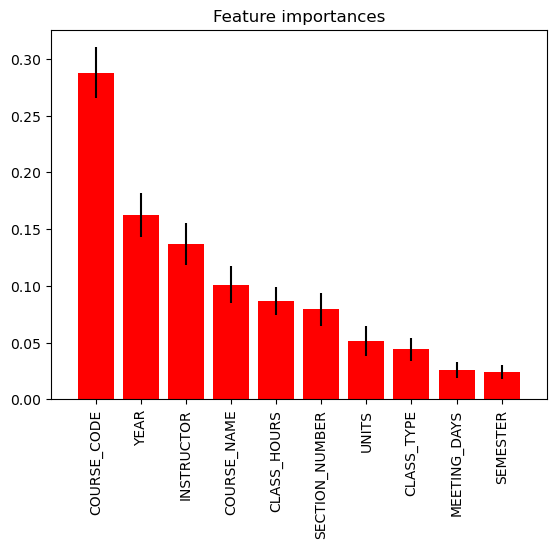

In [64]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Linear Models

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [65]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_score = linreg.score(X_test, y_test)
linear_y_pred = linreg.predict(X_test)
linearRmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
linearMae = mean_absolute_error(y_test, linear_y_pred)
print(f'Linear Regression score: {linreg_score:.2f}')
print(f'Linear Regression RMSE: {linearRmse:.2f}')
print(f'Linear Regression MAE: {linearMae:.2f}')

Linear Regression score: 0.08
Linear Regression RMSE: 0.97
Linear Regression MAE: 0.69


In [66]:
#RidgeRegression
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
ridge_y_pred=ridge.predict(X_test)
ridgeRmse=np.sqrt(mean_squared_error(y_test, ridge_y_pred))
ridgeMae = mean_absolute_error(y_test, ridge_y_pred)
print(f'Ridge Regression score: {ridge_score:.2f}')
print(f'Ridge Regression RMSE: {ridgeRmse:.2f}')
print(f'Ridge Regression MAE: {ridgeMae:.2f}')

Ridge Regression score: 0.08
Ridge Regression RMSE: 0.97
Ridge Regression MAE: 0.69


In [67]:
#Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)
print(f'Lasso Regression score: {lasso_score:.2f}')
lasso_y_pred=lasso.predict(X_test)
lassoRmse=np.sqrt(mean_squared_error(y_test, lasso_y_pred))
lassoMae = mean_absolute_error(y_test, lasso_y_pred)
print(f'Lasso Regression RMSE: {lassoRmse:.2f}')
print(f'Lasso Regression MAE: {lassoMae:.2f}')

Lasso Regression score: 0.03
Lasso Regression RMSE: 0.99
Lasso Regression MAE: 0.71


# Nonlinear regression models

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [69]:
#SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
svr_score = svr_reg.score(X_test, y_test)
print(f'SVR score: {svr_score:.2f}')
y_pred_SVR=svr_reg.predict(X_test)
mse_SVR=mean_squared_error(y_test,y_pred_SVR)
#print(f'SVR MSE:{mse_SVR}')
SVR_y_pred=svr_reg.predict(X_test)
SVRRmse=np.sqrt(mean_squared_error(y_test, SVR_y_pred))
SVRMae = mean_absolute_error(y_test, SVR_y_pred)
print(f'SVR Regression RMSE: {SVRRmse:.2f}')
print(f'SVR Regression MAE: {SVRMae:.2f}')

C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR score: 0.33
SVR Regression RMSE: 0.83
SVR Regression MAE: 0.50


In [70]:
#KNN
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
knn_score=knn.score(X_test, y_test)
print(f'KNN score: {knn_score:.2f}')
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute error:", mae)

KNN score: 0.29
Mean squared error: 0.7229820696205623
Mean Absolute error: 0.5549646258325196


In [71]:
# RANDOM FOREST MODEL

In [72]:
rf_reg = RandomForestRegressor(n_estimators=300, random_state=62, min_samples_split=2, max_features=6,min_samples_leaf=1)
rf_reg.fit(X_train, y_train)
rf_score = rf_reg.score(X_test, y_test)
print(f'Random Forest score: {rf_score:.2f}')
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Square error:", mse)
print("Mean Absolute error:", mae)

C:\Users\Checkout\AppData\Local\Temp\ipykernel_26860\1543396057.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Random Forest score: 0.67
Mean Square error: 0.33444441785662665
Mean Absolute error: 0.3614128230226627


In [73]:
# Final Random Forest Regression Model after tuning

# BEST MODEL

In [74]:
# remove the 'CLASS_HOURS' column from the feature matrix
X_train_new = X_train.drop('CLASS_HOURS', axis=1)
X_test_new = X_test.drop('CLASS_HOURS', axis=1)

# create the Random Forest Regression model using the new feature matrix
rf_reg_new = RandomForestRegressor(n_estimators=500, random_state=62, min_samples_split=2, max_features=6, min_samples_leaf=1)
rf_reg_new.fit(X_train_new, y_train)

# evaluate the performance of the model on the test set
rf_score_new = rf_reg_new.score(X_test_new, y_test)
print(f'Random Forest score without CLASS_HOURS column: {rf_score_new:.2f}')

y_pred_new = rf_reg_new.predict(X_test_new)
mse_new = mean_squared_error(y_test, y_pred_new)
mae_new = mean_absolute_error(y_test, y_pred_new)
print("Mean Square error without CLASS_HOURS column:", mse_new)
print("Mean Absolute error without CLASS_HOURS column:", mae_new)


C:\Users\Checkout\AppData\Local\Temp\ipykernel_26860\103434250.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_new.fit(X_train_new, y_train)


Random Forest score without CLASS_HOURS column: 0.70
Mean Square error without CLASS_HOURS column: 0.3085761290910362
Mean Absolute error without CLASS_HOURS column: 0.3476064364870397


In [75]:
import joblib

# Save the trained model to a file
filename = 'rf_reg_new.pkl'
joblib.dump(rf_reg_new, filename)

['rf_reg_new.pkl']